# The Shakespeare Project

In [1]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import combinations


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Galateia\Anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Shakespeare_data.csv')
df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


In [3]:
df['Play'].unique()

array(['Henry IV', 'Henry VI Part 1', 'Henry VI Part 2',
       'Henry VI Part 3', 'Alls well that ends well', 'As you like it',
       'Antony and Cleopatra', 'A Comedy of Errors', 'Coriolanus',
       'Cymbeline', 'Hamlet', 'Henry V', 'Henry VIII', 'King John',
       'Julius Caesar', 'King Lear', 'Loves Labours Lost', 'macbeth',
       'Measure for measure', 'Merchant of Venice',
       'Merry Wives of Windsor', 'A Midsummer nights dream',
       'Much Ado about nothing', 'Othello', 'Pericles', 'Richard II',
       'Richard III', 'Romeo and Juliet', 'Taming of the Shrew',
       'The Tempest', 'Timon of Athens', 'Titus Andronicus',
       'Troilus and Cressida', 'Twelfth Night', 'Two Gentlemen of Verona',
       'A Winters Tale'], dtype=object)

In [4]:
comedies = ["A Midsummer nights dream", "A Comedy Of Errors",
       "Taming of the Shrew","Two Gentlemen Of Verona",
       "Loves Labours Lost", "The Tempest","A Winters Tale", 
       "Cymbeline", "Pericles","Alls well that ends well",
       "Measure for measure", "Troilus and Cressida", 
       "Twelfth Night","As you like it", "Much Ado about nothing",
       "Merchant Of Venice","Merry Wives Of Windsor"]

tragedies = ["macbeth","Titus Andronicus", "Romeo and Juliet", 
             "King Lear","Hamlet","Othello", "Julius Caesar", 
             "Antony and Cleopatra", "Coriolanus", "Timon of Athens"]

histories = ["King John", "Henry IV", "Henry VI Part 1", "Henry V", "Henry VI Part 2", "Henry VI Part 3", "Henry VIII", "Richard II", "Richard III"]


In [5]:
row_indexes = df[df['Play'].isin(comedies)].index
df.loc[row_indexes,'Genre']="Comedy"

row_indexes = df[df['Play'].isin(tragedies)].index
df.loc[row_indexes,'Genre']="Tragedy"

row_indexes = df[df['Play'].isin(histories)].index
df.loc[row_indexes,'Genre']="History"
df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre
0,1,Henry IV,NaN,NaN,NaN,ACT I,History
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.,History
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...",History
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",History
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",History
...,...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely",Comedy
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part,Comedy
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first,Comedy
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.,Comedy


## Dropping stage directions

In [6]:
df = df.dropna()

In [7]:
df['Player'].value_counts()

GLOUCESTER       1811
HAMLET           1503
IAGO             1101
KING HENRY V     1029
BRUTUS            976
                 ... 
Some Others         1
All Ladies          1
Second Gaoler       1
Clerk               1
Third Roman         1
Name: Player, Length: 876, dtype: int64

>There are 934 characters in Shakespeare's plays.

In [8]:
df.groupby(['Play','Player']).count()

Dataline  PlayerLinenumber  \
Play                     Player                                         
A Midsummer nights dream ALL                      2                 2   
                         BOTTOM                 204               204   
                         COBWEB                   4                 4   
                         DEMETRIUS              134               134   
                         EGEUS                   41                41   
...                                             ...               ...   
macbeth                  Son                     20                20   
                         Third Apparition         5                 5   
                         Third Murderer           8                 8   
                         Third Witch             27                27   
                         YOUNG SIWARD             7                 7   

                                           ActSceneLine  PlayerLine  Genre  
Play                     Player                                             
A Midsummer nights dream ALL                          2           2      2  
                         BOTTOM                     204         204    204  
                         COBWEB                       4           4      4  
                         DEMETRIUS                  134         134    134  
                         EGEUS                       41          41     41  
...                                                 ...         ...    ...  
macbeth                  Son                         20          20     20  
                         Third Apparition             5           5      5  
                         Third Murderer               8           8      8  
                         Third Witch                 27          27     27  
                         YOUNG SIWARD                 7           7      7  

[1218 rows x 5 columns]

## Text clean up

In [9]:
df['PlayerLine']

3                  So shaken as we are, so wan with care,
4              Find we a time for frighted peace to pant,
5          And breathe short-winded accents of new broils
6                 To be commenced in strands afar remote.
7               No more the thirsty entrance of this soil
                               ...                       
111390    Is troth-plight to your daughter. Good Paulina,
111391         Lead us from hence, where we may leisurely
111392              Each one demand an answer to his part
111393     Perform'd in this wide gap of time since first
111394             We were dissever'd: hastily lead away.
Name: PlayerLine, Length: 95672, dtype: object

In [10]:
# Load the regular expression library
import re
# Remove punctuation
df['text_processed'] = df['PlayerLine'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text_processed'].head()

C:\Users\Galateia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Galateia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3              so shaken as we are so wan with care
4         find we a time for frighted peace to pant
5    and breathe short-winded accents of new broils
6            to be commenced in strands afar remote
7         no more the thirsty entrance of this soil
Name: text_processed, dtype: object

# LDA

In [11]:

stop_words = stopwords.words('english')
stop_words.extend(['from', 'thee', 'thy', 'thou', 'er'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
data_words

[['shaken', 'wan', 'care'],
 ['find', 'time', 'frighted', 'peace', 'pant'],
 ['breathe', 'short', 'winded', 'accents', 'new', 'broils'],
 ['commenced', 'strands', 'afar', 'remote'],
 ['thirsty', 'entrance', 'soil'],
 ['shall', 'daub', 'lips', 'children', 'blood'],
 ['shall', 'trenching', 'war', 'channel', 'fields'],
 ['bruise', 'flowerets', 'armed', 'hoofs'],
 ['hostile', 'paces', 'opposed', 'eyes'],
 ['like', 'meteors', 'troubled', 'heaven'],
 ['one', 'nature', 'one', 'substance', 'bred'],
 ['lately', 'meet', 'intestine', 'shock'],
 ['furious', 'close', 'civil', 'butchery'],
 ['shall', 'mutual', 'well', 'beseeming', 'ranks'],
 ['march', 'one', 'way', 'opposed'],
 ['acquaintance', 'kindred', 'allies'],
 ['edge', 'war', 'like', 'ill', 'sheathed', 'knife'],
 ['shall', 'cut', 'master', 'therefore', 'friends'],
 ['far', 'sepulchre', 'christ'],
 ['whose', 'soldier', 'whose', 'blessed', 'cross'],
 ['impressed', 'engaged', 'fight'],
 ['forthwith', 'power', 'english', 'shall', 'levy'],
 ['whos

In [12]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [13]:
def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

In [14]:
import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])





### Lemmatize without verbs

In [15]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])

In [16]:
print(data_lemmatized[:4])

[[], ['time', 'peace', 'pant'], ['short', 'winded', 'accent', 'new', 'broil'], ['commenced', 'strand', 'afar', 'remote']]


In [17]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
import gensim.corpora as corpora

In [19]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=7,alpha='auto', per_word_topics=True
)

In [20]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.035*"art" + 0.034*"true" + 0.026*"ever" + 0.021*"long" + 0.018*"part" + '
  '0.014*"tear" + 0.014*"child" + 0.013*"present" + 0.012*"boy" + '
  '0.012*"grace"'),
 (1,
  '0.035*"friend" + 0.027*"brother" + 0.027*"blood" + 0.026*"therefore" + '
  '0.023*"noble" + 0.022*"fair" + 0.021*"dear" + 0.018*"nature" + '
  '0.018*"reason" + 0.017*"peace"'),
 (2,
  '0.049*"love" + 0.038*"time" + 0.030*"death" + 0.026*"son" + 0.025*"night" + '
  '0.024*"away" + 0.021*"still" + 0.021*"fool" + 0.021*"old" + 0.020*"mine"'),
 (3,
  '0.046*"much" + 0.036*"never" + 0.031*"life" + 0.030*"day" + 0.029*"thus" + '
  '0.022*"none" + 0.019*"many" + 0.017*"first" + 0.017*"indeed" + 0.016*"sir"'),
 (4,
  '0.105*"good" + 0.086*"man" + 0.022*"yet" + 0.019*"daughter" + 0.016*"soul" '
  '+ 0.015*"faith" + 0.014*"enough" + 0.013*"thought" + 0.013*"mind" + '
  '0.011*"face"'),
 (5,
  '0.070*"well" + 0.046*"heart" + 0.041*"hand" + 0.034*"word" + 0.029*"sweet" '
  '+ 0.020*"woman" + 0.020*"king" + 0.015*"hence"

In [21]:

import pickle 
import pyLDAvis
import pyLDAvis.gensim
import os
os.chdir('..')
# Visualize the topics
num_topics = 7
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.368245 -0.157363       1        1  15.321556
4     -0.229223 -0.321769       2        1  14.995985
3     -0.052332  0.207490       3        1  14.599468
6     -0.063897  0.078224       4        1  14.512078
0     -0.002482  0.111076       5        1  14.408409
5      0.008706  0.071917       6        1  13.498001
1     -0.029018  0.010425       7        1  12.664504, topic_info=         Term         Freq        Total Category  logprob  loglift
191      good  2443.000000  2443.000000  Default  30.0000  30.0000
77        man  2007.000000  2007.000000  Default  29.0000  29.0000
39       well  1479.000000  1479.000000  Default  28.0000  28.0000
623      love  1177.000000  1177.000000  Default  27.0000  27.0000
90       much  1040.000000  1040.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1056  opinion   109.797203   110.652534   Topic7  -5.1916   2.0586
269       leg   108.127937   108.983536   Topic7  -5.2070   2.0585
1869    black   108.335876   109.193596   Topic7  -5.2050   2.0585
924    virtue   104.929192   105.783958   Topic7  -5.2370   2.0583
483   valiant   104.792191   105.647980   Topic7  -5.2383   2.0582

[244 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
601       7  0.996796      age
510       6  0.991407      air
295       1  0.996949    alone
225       4  0.990728  already
55        5  0.995550      arm
...     ...       ...      ...
62        6  0.997765     year
240       2  0.998788      yet
101       3  0.995807    young
101       7  0.003254    young
761       1  0.995197    youth

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 7, 1, 6, 2])

# Visualization of plays as networks

In [26]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Galateia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
g= nx.Graph()

In [28]:
g = nx.from_pandas_edgelist(df, source='Play',target='Player')

C:\Users\Galateia\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


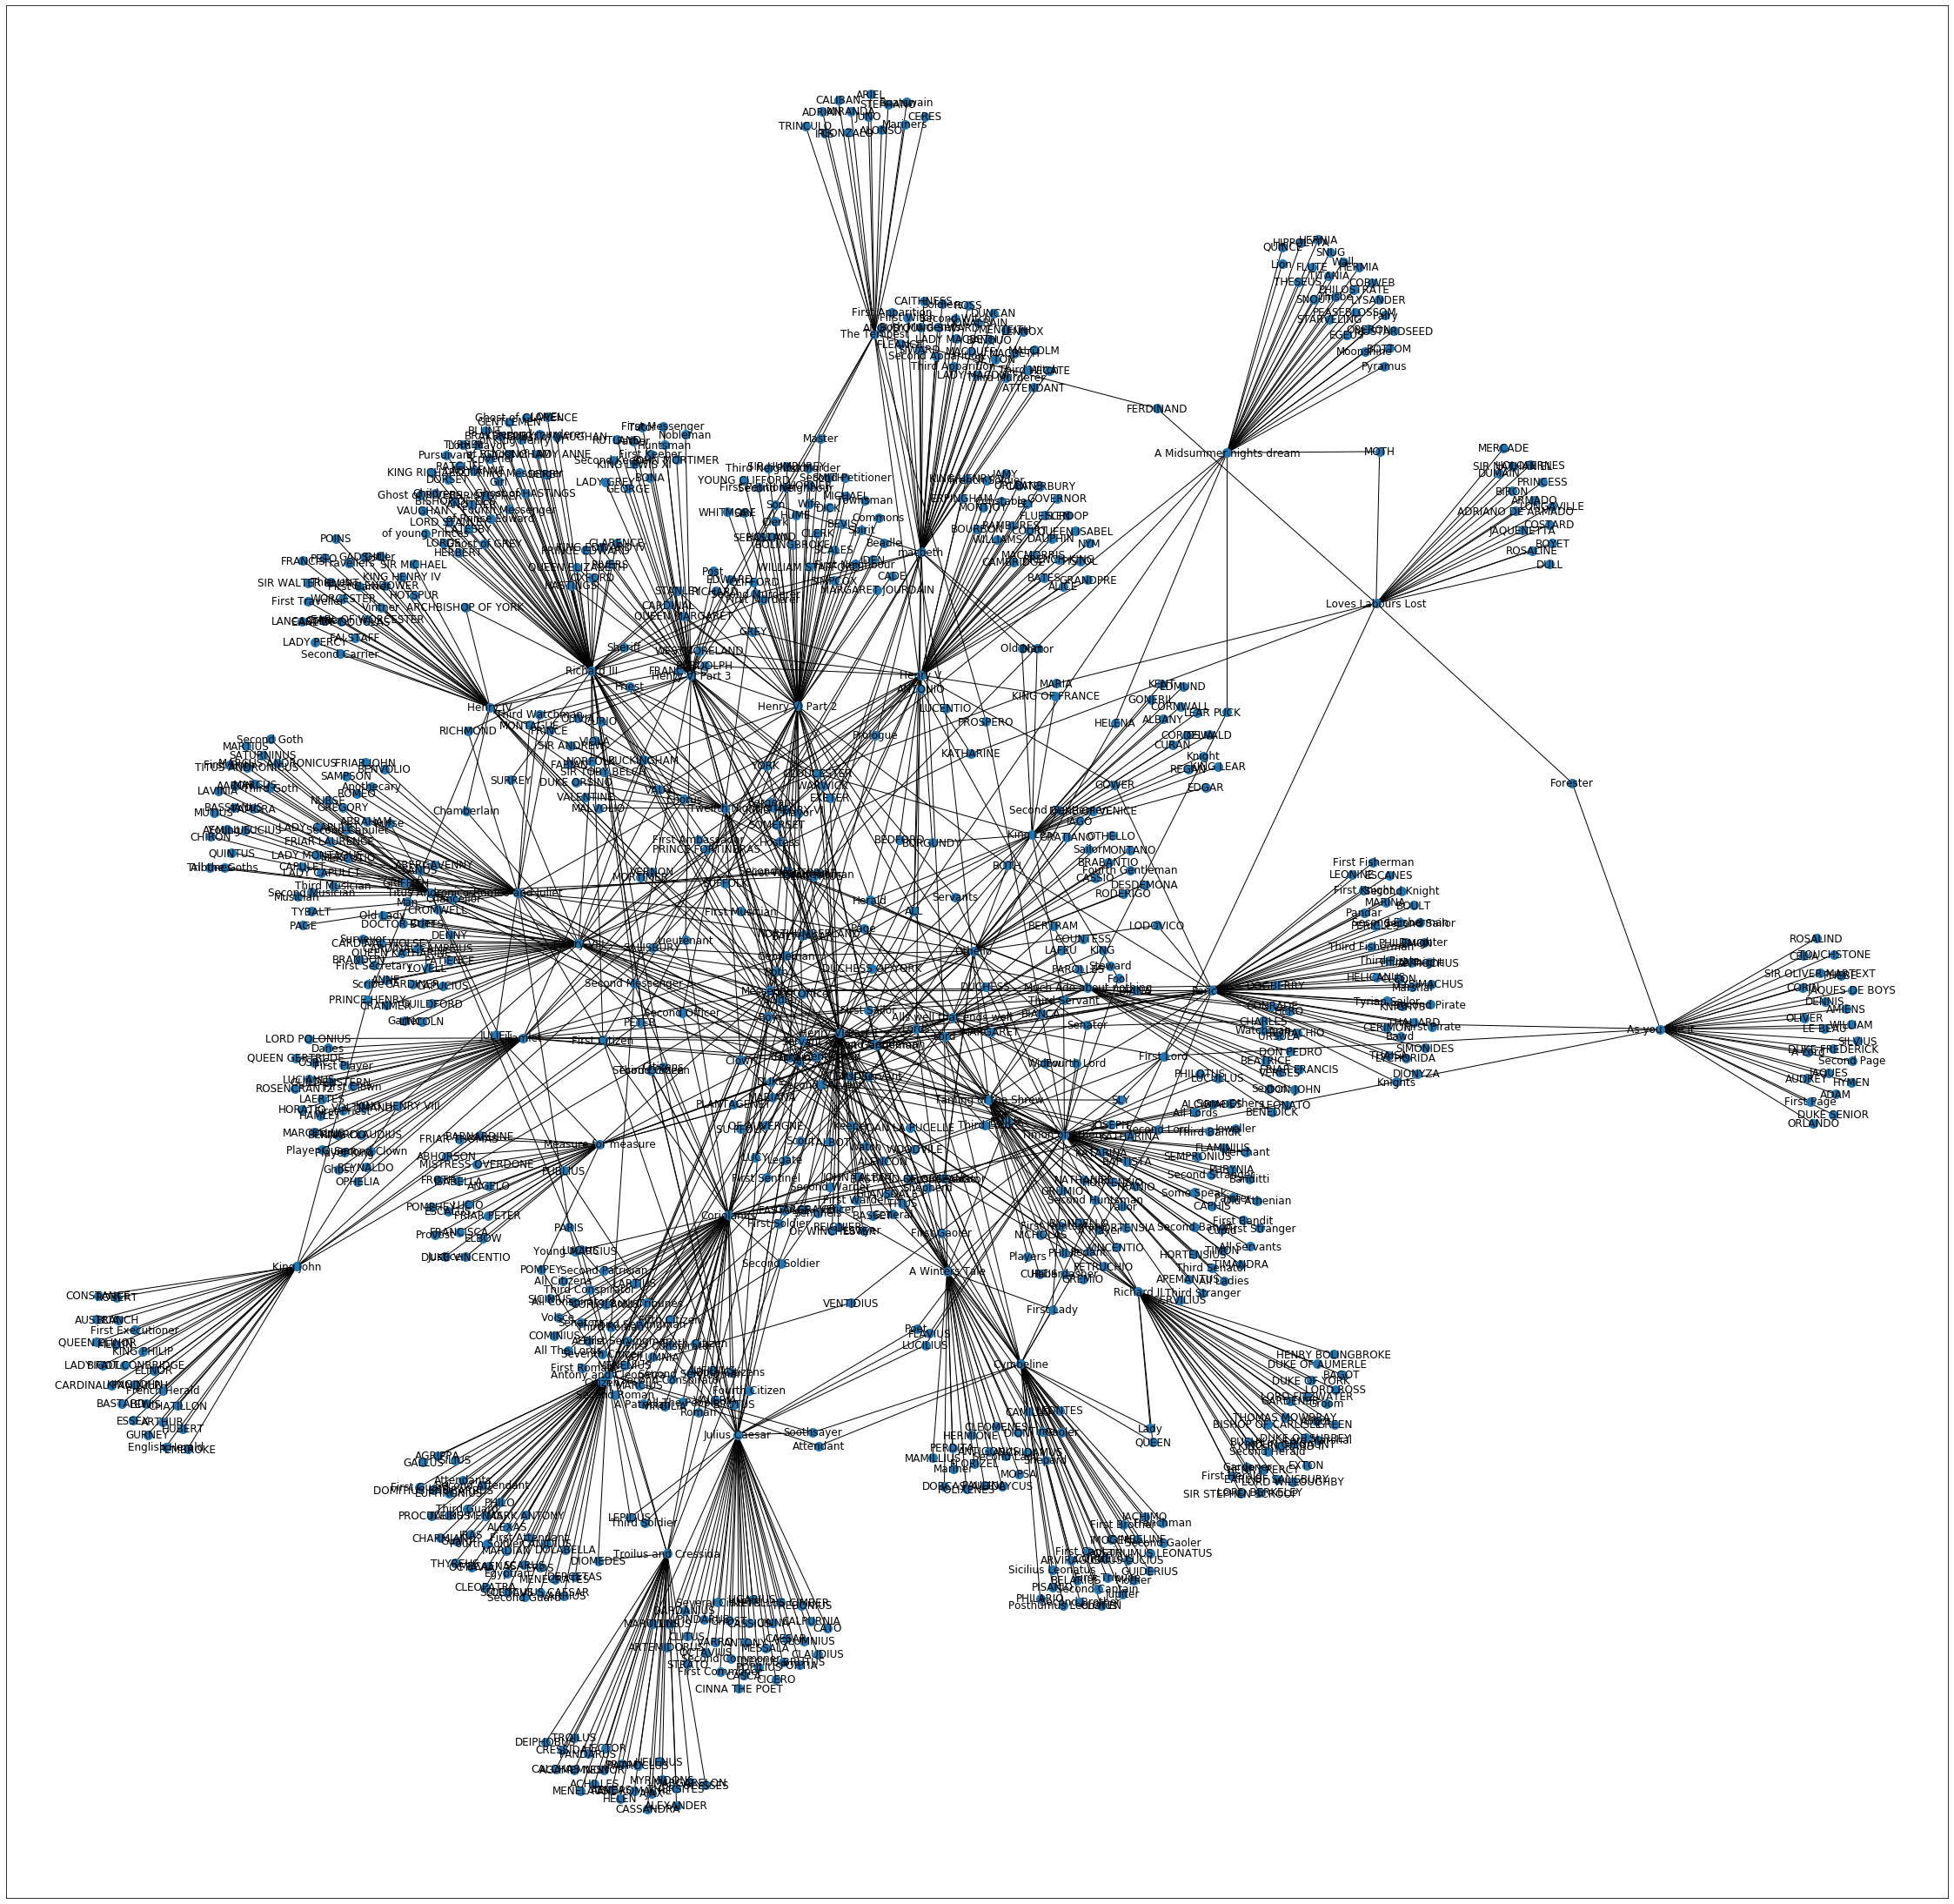

In [29]:
plt.figure(figsize=(40,40)) 
nx.draw_networkx(g,with_labels=True,node_size=100)
plt.show()


# Finding most influential role in Shakespeare's plays

In [32]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures


,Degree Centrality,Page Rank,Name
0,0.038589,0.013924,Henry IV
1,0.001103,0.000503,KING HENRY IV
2,0.003308,0.001098,WESTMORELAND
3,0.001103,0.000503,FALSTAFF
4,0.002205,0.000868,PRINCE HENRY
...,...,...,...
903,0.001103,0.000472,FLORIZEL
904,0.001103,0.000472,PERDITA
905,0.001103,0.000472,DORCAS
906,0.001103,0.000472,MOPSA


* Degree Centrality shows how many direct, ‘one hop’ connections each node has to other nodes in the network.
* Page Rank uncovers nodes whose influence extends beyond their direct connections into the wider network.

In [33]:
#Centrality measures only for players (or actors)
centralMeasures[centralMeasures['Name'].isin(df['Player'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)

,Degree Centrality,Page Rank,Name
30,0.024256,0.007188,Messenger
21,0.018743,0.005634,Servant
165,0.015436,0.004578,All
61,0.009923,0.003053,Captain
176,0.008820,0.002769,First Lord
...,...,...,...
379,0.001103,0.000478,Constable
380,0.001103,0.000478,FLUELLEN
382,0.001103,0.000478,JAMY
383,0.001103,0.000478,MACMORRIS


>Messenger seems to be the character with most connections within plays. 

In [34]:
#Centrality measures only for players (or actors)
centralMeasures[centralMeasures['Name'].isin(df['Player'].unique().tolist())].sort_values(by='Page Rank',ascending=False)

,Degree Centrality,Page Rank,Name
30,0.024256,0.007188,Messenger
21,0.018743,0.005634,Servant
165,0.015436,0.004578,All
61,0.009923,0.003053,Captain
328,0.008820,0.002784,Lord
...,...,...,...
175,0.001103,0.000442,KING
173,0.001103,0.000442,PAROLLES
169,0.001103,0.000442,COUNTESS
170,0.001103,0.000442,BERTRAM


>Messenger is the most influencial character in Shakespeare's plays.

# Finding most influential play

In [35]:
centralMeasures[centralMeasures['Name'].isin(df['Play'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)

,Degree Centrality,Page Rank,Name
698,0.077178,0.025126,Richard III
85,0.071665,0.022677,Henry VI Part 2
260,0.067255,0.022552,Coriolanus
802,0.060639,0.020059,Timon of Athens
213,0.059537,0.020998,Antony and Cleopatra
36,0.057332,0.018328,Henry VI Part 1
454,0.055127,0.019230,Julius Caesar
636,0.052922,0.018584,Pericles
367,0.051819,0.017321,Henry V
399,0.051819,0.017103,Henry VIII


* The play with the most connections is "Richard III".

In [36]:
centralMeasures[centralMeasures['Name'].isin(df['Play'].unique().tolist())].sort_values(by='Page Rank',ascending=False)

,Degree Centrality,Page Rank,Name
698,0.077178,0.025126,Richard III
85,0.071665,0.022677,Henry VI Part 2
260,0.067255,0.022552,Coriolanus
213,0.059537,0.020998,Antony and Cleopatra
802,0.060639,0.020059,Timon of Athens
454,0.055127,0.019230,Julius Caesar
636,0.052922,0.018584,Pericles
36,0.057332,0.018328,Henry VI Part 1
367,0.051819,0.017321,Henry V
399,0.051819,0.017103,Henry VIII


>The most influential play is "Richard II".

# One play visualization

## Othello 

In [68]:
play_name = 'Othello'

> We can observe the different structure of the various plays just by changing "play_name"

In [69]:
play_df = pd.DataFrame()
play_df = df.loc[df['Play'] == play_name]
play_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre,text_processed
72003,72004,Othello,1.0,1.1.1,RODERIGO,"Tush! never tell me, I take it much unkindly",Tragedy,tush never tell me i take it much unkindly
72004,72005,Othello,1.0,1.1.2,RODERIGO,"That thou, Iago, who hast had my purse",Tragedy,that thou iago who hast had my purse
72005,72006,Othello,1.0,1.1.3,RODERIGO,"As if the strings were thine, shouldst know of...",Tragedy,as if the strings were thine shouldst know of ...
72006,72007,Othello,2.0,1.1.4,IAGO,"'Sblood, but you will not hear me:",Tragedy,'sblood but you will not hear me:
72007,72008,Othello,2.0,1.1.5,IAGO,"If ever I did dream of such a matter, Abhor me.",Tragedy,if ever i did dream of such a matter abhor me
...,...,...,...,...,...,...,...,...
75756,75757,Othello,178.0,5.2.420,LODOVICO,"For they succeed on you. To you, lord governor,",Tragedy,for they succeed on you to you lord governor
75757,75758,Othello,178.0,5.2.421,LODOVICO,"Remains the censure of this hellish villain,",Tragedy,remains the censure of this hellish villain
75758,75759,Othello,178.0,5.2.422,LODOVICO,"The time, the place, the torture: O, enforce it!",Tragedy,the time the place the torture: o enforce it
75759,75760,Othello,178.0,5.2.423,LODOVICO,Myself will straight aboard: and to the state,Tragedy,myself will straight aboard: and to the state


In [70]:
play_df['Player'].unique()

array(['RODERIGO', 'IAGO', 'BRABANTIO', 'OTHELLO', 'CASSIO',
       'First Officer', 'DUKE OF VENICE', 'First Senator',
       'Second Senator', 'Sailor', 'Messenger', 'Senator', 'DESDEMONA',
       'MONTANO', 'First Gentleman', 'Second Gentleman',
       'Third Gentleman', 'Fourth Gentleman', 'Second Gentlemen',
       'EMILIA', 'Herald', 'All', 'Clown', 'First Musician', 'Gentleman',
       'BIANCA', 'LODOVICO', 'GRATIANO'], dtype=object)

In [71]:
play_df[['Act','Scene','Line']] = play_df['ActSceneLine'].str.split('.',expand = True).astype(float)

C:\Users\Galateia\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [72]:
play_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre,text_processed,Act,Scene,Line
72003,72004,Othello,1.0,1.1.1,RODERIGO,"Tush! never tell me, I take it much unkindly",Tragedy,tush never tell me i take it much unkindly,1.0,1.0,1.0
72004,72005,Othello,1.0,1.1.2,RODERIGO,"That thou, Iago, who hast had my purse",Tragedy,that thou iago who hast had my purse,1.0,1.0,2.0
72005,72006,Othello,1.0,1.1.3,RODERIGO,"As if the strings were thine, shouldst know of...",Tragedy,as if the strings were thine shouldst know of ...,1.0,1.0,3.0
72006,72007,Othello,2.0,1.1.4,IAGO,"'Sblood, but you will not hear me:",Tragedy,'sblood but you will not hear me:,1.0,1.0,4.0
72007,72008,Othello,2.0,1.1.5,IAGO,"If ever I did dream of such a matter, Abhor me.",Tragedy,if ever i did dream of such a matter abhor me,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
75756,75757,Othello,178.0,5.2.420,LODOVICO,"For they succeed on you. To you, lord governor,",Tragedy,for they succeed on you to you lord governor,5.0,2.0,420.0
75757,75758,Othello,178.0,5.2.421,LODOVICO,"Remains the censure of this hellish villain,",Tragedy,remains the censure of this hellish villain,5.0,2.0,421.0
75758,75759,Othello,178.0,5.2.422,LODOVICO,"The time, the place, the torture: O, enforce it!",Tragedy,the time the place the torture: o enforce it,5.0,2.0,422.0
75759,75760,Othello,178.0,5.2.423,LODOVICO,Myself will straight aboard: and to the state,Tragedy,myself will straight aboard: and to the state,5.0,2.0,423.0


In [73]:
characters = play_df.groupby(['Player']).size().reset_index()
characters.rename(columns = {0: 'Count'}, inplace = True)
# Get top 20 characters
characters = characters[characters["Count"] > 5]

In [74]:
play_graph = nx.Graph()
play_graph.add_nodes_from(characters['Player'])

scenes_df = play_df.groupby(['Act','Scene','Player']).size().reset_index()
scenes_df = scenes_df[scenes_df["Player"].isin(characters["Player"])]
scenes_df.rename(columns = {0: 'Count'}, inplace = True)

In [77]:
# Go scene by scene
for (act,scene), counts in scenes_df.groupby(['Act','Scene']):
    # Get all the characters that are in that scene
    characters = counts["Player"].tolist()
    # If a scene contains characters [A,B,C] we want our graph to
    # contain the edges [(A,B),(A,C),(B,C)]
    pairs = list(combinations(characters,2))
    for (a_char, b_char) in pairs:
        if play_graph.has_edge(a_char, b_char):
            play_graph[a_char][b_char]['weight'] += 1
        else:
            play_graph.add_edge(a_char, b_char,weight=1)


C:\Users\Galateia\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


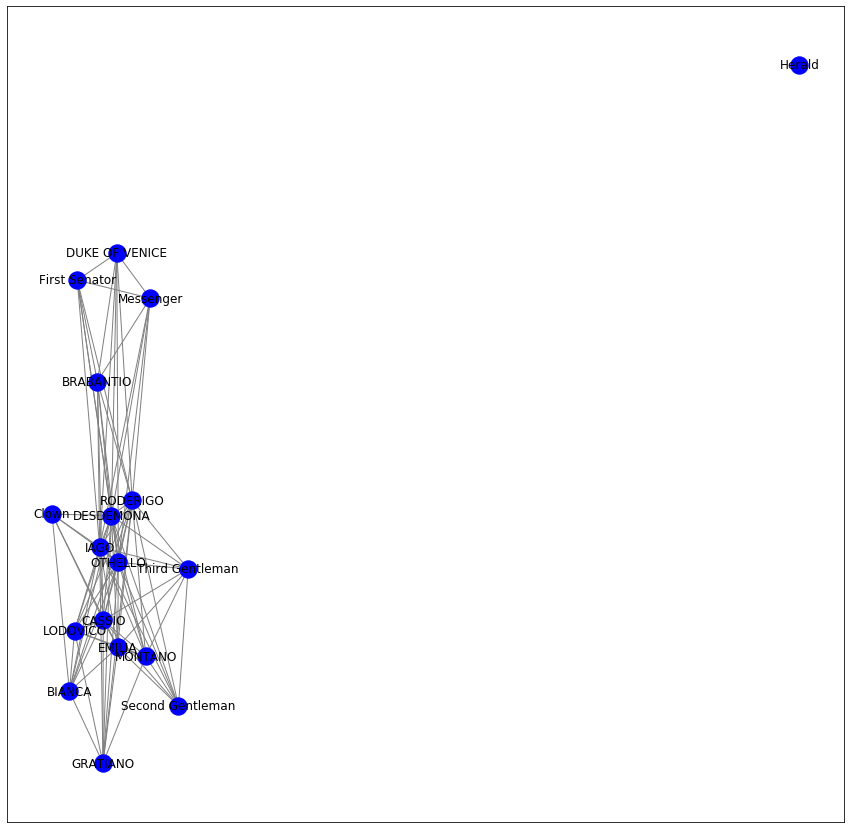

In [78]:
plt.figure(figsize=(15,15)) 
nx.draw_networkx(play_graph,with_labels=True,node_color='b', edge_color='grey')
plt.show()

>Not all characters are connected to each other.

## Hamlet

In [22]:
play_name = 'Hamlet'
play_df = pd.DataFrame()
play_df = df.loc[df['Play'] == play_name]
play_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre,text_processed
32435,32436,Hamlet,1.0,1.1.1,BERNARDO,Who's there?,Tragedy,who's there
32436,32437,Hamlet,2.0,1.1.2,FRANCISCO,"Nay, answer me: stand, and unfold yourself.",Tragedy,nay answer me: stand and unfold yourself
32437,32438,Hamlet,3.0,1.1.3,BERNARDO,Long live the king!,Tragedy,long live the king
32438,32439,Hamlet,4.0,1.1.4,FRANCISCO,Bernardo?,Tragedy,bernardo
32439,32440,Hamlet,5.0,1.1.5,BERNARDO,He.,Tragedy,he
...,...,...,...,...,...,...,...,...
36671,36672,Hamlet,147.0,5.2.421,PRINCE FORTINBRAS,Speak loudly for him.,Tragedy,speak loudly for him
36672,36673,Hamlet,147.0,5.2.422,PRINCE FORTINBRAS,Take up the bodies: such a sight as this,Tragedy,take up the bodies: such a sight as this
36673,36674,Hamlet,147.0,5.2.423,PRINCE FORTINBRAS,"Becomes the field, but here shows much amiss.",Tragedy,becomes the field but here shows much amiss
36674,36675,Hamlet,147.0,5.2.424,PRINCE FORTINBRAS,"Go, bid the soldiers shoot.",Tragedy,go bid the soldiers shoot


In [23]:

play_df[['Act','Scene','Line']] = play_df['ActSceneLine'].str.split('.',expand = True).astype(float)

C:\Users\Galateia\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
characters = play_df.groupby(['Player']).size().reset_index()
characters.rename(columns = {0: 'Count'}, inplace = True)
# Get top 20 characters
characters = characters[characters["Count"] > 5]

In [30]:
play_graph = nx.Graph()
play_graph.add_nodes_from(characters['Player'])

scenes_df = play_df.groupby(['Act','Scene','Player']).size().reset_index()
scenes_df = scenes_df[scenes_df["Player"].isin(characters["Player"])]
scenes_df.rename(columns = {0: 'Count'}, inplace = True)

In [31]:
# Go scene by scene
for (act,scene), counts in scenes_df.groupby(['Act','Scene']):
    # Get all the characters that are in that scene
    characters = counts["Player"].tolist()
    # If a scene contains characters [A,B,C] we want our graph to
    # contain the edges [(A,B),(A,C),(B,C)]
    pairs = list(combinations(characters,2))
    for (a_char, b_char) in pairs:
        if play_graph.has_edge(a_char, b_char):
            play_graph[a_char][b_char]['weight'] += 1
        else:
            play_graph.add_edge(a_char, b_char,weight=1)

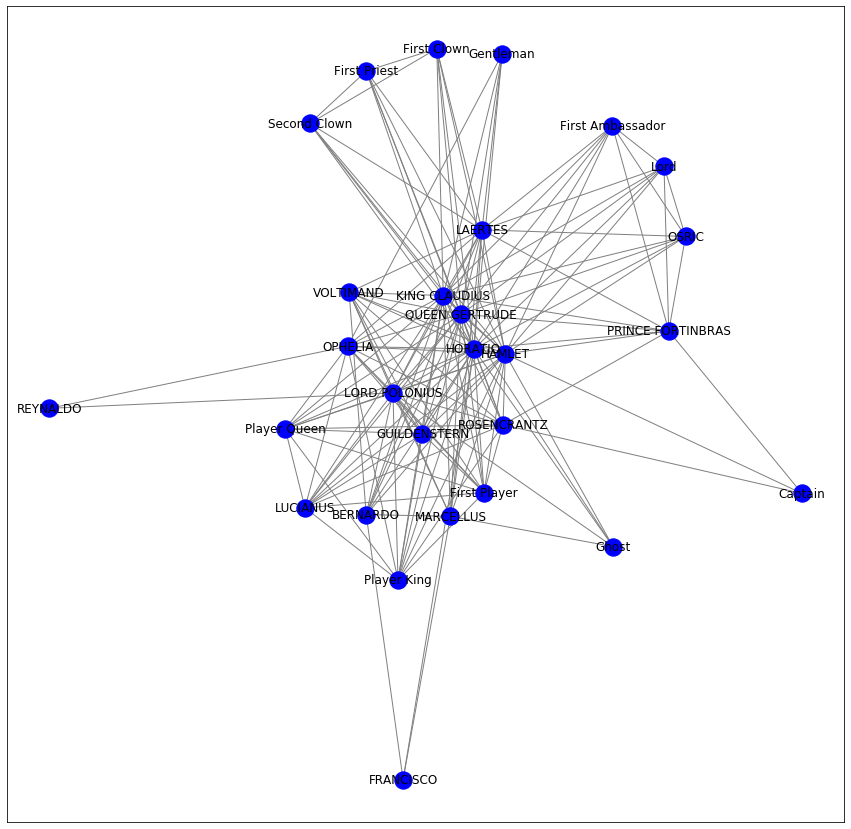

In [32]:
plt.figure(figsize=(15,15)) 
nx.draw_networkx(play_graph,with_labels=True,node_color='b', edge_color='grey')
plt.show()

# Experimentation based on Genre

## Tragedy


In [33]:
genre_df = pd.DataFrame()
genre_df = df.loc[df['Genre'] == "Tragedy"]
genre_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre,text_processed
18568,18569,Antony and Cleopatra,1.0,1.1.1,PHILO,"Nay, but this dotage of our general's",Tragedy,nay but this dotage of our general's
18569,18570,Antony and Cleopatra,1.0,1.1.2,PHILO,"O'erflows the measure: those his goodly eyes,",Tragedy,o'erflows the measure: those his goodly eyes
18570,18571,Antony and Cleopatra,1.0,1.1.3,PHILO,That o'er the files and musters of the war,Tragedy,that o'er the files and musters of the war
18571,18572,Antony and Cleopatra,1.0,1.1.4,PHILO,"Have glow'd like plated Mars, now bend, now turn,",Tragedy,have glow'd like plated mars now bend now turn
18572,18573,Antony and Cleopatra,1.0,1.1.5,PHILO,The office and devotion of their view,Tragedy,the office and devotion of their view
...,...,...,...,...,...,...,...,...
99185,99186,Titus Andronicus,43.0,5.3.201,LUCIUS,"And, being so, shall have like want of pity.",Tragedy,and being so shall have like want of pity
99186,99187,Titus Andronicus,43.0,5.3.202,LUCIUS,"See justice done on Aaron, that damn'd Moor,",Tragedy,see justice done on aaron that damn'd moor
99187,99188,Titus Andronicus,43.0,5.3.203,LUCIUS,By whom our heavy haps had their beginning:,Tragedy,by whom our heavy haps had their beginning:
99188,99189,Titus Andronicus,43.0,5.3.204,LUCIUS,"Then, afterwards, to order well the state,",Tragedy,then afterwards to order well the state


In [34]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'thee', 'thy', 'thou', 'er'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = genre_df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [35]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [36]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])

In [37]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [38]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=7,alpha='auto', per_word_topics=True
)
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.088*"good" + 0.045*"friend" + 0.043*"night" + 0.035*"much" + 0.031*"thus" '
  '+ 0.025*"thing" + 0.021*"old" + 0.020*"still" + 0.016*"back" + '
  '0.016*"fair"'),
 (1,
  '0.055*"well" + 0.034*"never" + 0.032*"day" + 0.031*"away" + 0.030*"tear" + '
  '0.027*"blood" + 0.018*"nature" + 0.016*"hence" + 0.015*"light" + '
  '0.013*"deed"'),
 (2,
  '0.054*"love" + 0.052*"heart" + 0.030*"great" + 0.030*"true" + 0.020*"mine" '
  '+ 0.019*"mother" + 0.018*"wrong" + 0.016*"hour" + 0.013*"enemy" + '
  '0.012*"bloody"'),
 (3,
  '0.039*"death" + 0.027*"life" + 0.026*"brother" + 0.026*"sweet" + '
  '0.018*"long" + 0.016*"many" + 0.015*"head" + 0.015*"murder" + '
  '0.014*"sorrow" + 0.013*"full"'),
 (4,
  '0.046*"son" + 0.029*"noble" + 0.028*"ever" + 0.025*"even" + 0.023*"yet" + '
  '0.019*"god" + 0.017*"fear" + 0.017*"none" + 0.017*"place" + 0.016*"tongue"'),
 (5,
  '0.087*"man" + 0.036*"art" + 0.032*"time" + 0.026*"word" + 0.023*"dead" + '
  '0.021*"poor" + 0.020*"therefore" + 0.016*"gold"

In [39]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim
import os
os.chdir('..')
# Visualize the topics
num_topics = 7
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_tragedy_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_tragedy_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.319376  0.151289       1        1  15.988773
0     -0.040102 -0.157403       2        1  14.792731
3     -0.217630  0.290563       3        1  14.714122
4     -0.024858 -0.109901       4        1  13.804250
6      0.070467 -0.075452       5        1  13.800940
1     -0.099595 -0.113457       6        1  13.665269
2     -0.007659  0.014361       7        1  13.233908, topic_info=         Term        Freq       Total Category  logprob  loglift
175       man  700.000000  700.000000  Default  30.0000  30.0000
20       good  663.000000  663.000000  Default  29.0000  29.0000
106      well  381.000000  381.000000  Default  28.0000  28.0000
27       love  365.000000  365.000000  Default  27.0000  27.0000
184      hand  355.000000  355.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
451       sea   46.380962   47.608658   Topic7  -4.9716   1.9963
121   fortune   78.617668   83.467903   Topic7  -4.4439   1.9625
1985     open   36.458572   37.560555   Topic7  -5.2124   1.9926
2967      woe   43.139656   46.039700   Topic7  -5.0441   1.9573
1220  empress   56.838383  111.328247   Topic7  -4.7683   1.3501

[273 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
367       4  0.216268     age
367       6  0.772386     age
754       3  0.986899     air
1426      7  0.974823   alive
108       7  0.983134  almost
...     ...       ...     ...
122       4  0.983173     yet
122       6  0.012138     yet
1232      1  0.954614   young
1232      7  0.037682   young
475       2  0.988884   youth

[328 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 5, 7, 2, 3])

## Comedy

In [40]:
genre_df = pd.DataFrame()
genre_df = df.loc[df['Genre'] == "Comedy"]
genre_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre,text_processed
12663,12664,Alls well that ends well,1.0,1.1.1,COUNTESS,"In delivering my son from me, I bury a second ...",Comedy,in delivering my son from me i bury a second h...
12664,12665,Alls well that ends well,2.0,1.1.2,BERTRAM,"And I in going, madam, weep o'er my father's d...",Comedy,and i in going madam weep o'er my father's death
12665,12666,Alls well that ends well,2.0,1.1.3,BERTRAM,"anew: but I must attend his majesty's command, to",Comedy,anew: but i must attend his majesty's command to
12666,12667,Alls well that ends well,2.0,1.1.4,BERTRAM,"whom I am now in ward, evermore in subjection.",Comedy,whom i am now in ward evermore in subjection
12667,12668,Alls well that ends well,3.0,1.1.5,LAFEU,"You shall find of the king a husband, madam, you,",Comedy,you shall find of the king a husband madam you
...,...,...,...,...,...,...,...,...
111390,111391,A Winters Tale,38.0,5.3.179,LEONTES,"Is troth-plight to your daughter. Good Paulina,",Comedy,is troth-plight to your daughter good paulina
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely",Comedy,lead us from hence where we may leisurely
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part,Comedy,each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first,Comedy,perform'd in this wide gap of time since first


In [41]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'thee', 'thy', 'thou', 'er'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = genre_df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [42]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [43]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])

In [44]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=7,alpha='auto', per_word_topics=True
)
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"hand" + 0.035*"true" + 0.033*"great" + 0.032*"thing" + 0.030*"much" '
  '+ 0.029*"ever" + 0.027*"even" + 0.023*"yet" + 0.015*"nature" + '
  '0.014*"wife"'),
 (1,
  '0.067*"well" + 0.038*"daughter" + 0.034*"heart" + 0.021*"fool" + '
  '0.021*"long" + 0.021*"poor" + 0.020*"way" + 0.020*"sweet" + 0.017*"worth" + '
  '0.016*"year"'),
 (2,
  '0.041*"eye" + 0.041*"never" + 0.020*"little" + 0.015*"reason" + '
  '0.014*"mother" + 0.013*"piece" + 0.013*"earth" + 0.012*"fear" + 0.012*"sea" '
  '+ 0.012*"youth"'),
 (3,
  '0.043*"time" + 0.030*"king" + 0.029*"death" + 0.025*"son" + 0.024*"woman" + '
  '0.021*"none" + 0.019*"fellow" + 0.018*"faith" + 0.017*"blood" + '
  '0.017*"dead"'),
 (4,
  '0.045*"love" + 0.029*"old" + 0.026*"mine" + 0.023*"friend" + 0.023*"day" + '
  '0.021*"therefore" + 0.019*"fair" + 0.018*"desire" + 0.018*"child" + '
  '0.016*"present"'),
 (5,
  '0.074*"man" + 0.032*"thus" + 0.024*"away" + 0.022*"dear" + 0.021*"first" + '
  '0.020*"sir" + 0.020*"indeed" + 0.0

In [46]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim
import os
os.chdir('..')
# Visualize the topics
num_topics = 7
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_comedy_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_comedy_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.346282 -0.110192       1        1  14.995400
0     -0.086975 -0.090764       2        1  14.509066
1      0.070242  0.355920       3        1  14.437413
4     -0.018181 -0.119182       4        1  14.306376
5     -0.095061 -0.036965       5        1  14.287964
2     -0.114056  0.025150       6        1  14.246273
3     -0.102252 -0.023966       7        1  13.217502, topic_info=         Term        Freq       Total Category  logprob  loglift
38       good  981.000000  981.000000  Default  30.0000  30.0000
157       man  626.000000  626.000000  Default  29.0000  29.0000
54       well  563.000000  563.000000  Default  28.0000  28.0000
94       love  374.000000  374.000000  Default  27.0000  27.0000
14       time  333.000000  333.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
78      blood  130.349213  132.650620   Topic7  -4.0820   2.0061
461     speak   47.279022   48.118813   Topic7  -5.0962   2.0060
20     almost   74.935822   76.414993   Topic7  -4.6356   2.0041
325  creature   54.779133   58.228691   Topic7  -4.9489   1.9626
100      much   56.947262  472.435913   Topic7  -4.9101  -0.0921

[263 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4159      2  0.984639    achille
1207      2  0.990747     action
511       6  0.987175  affection
307       3  0.985089        age
1099      4  0.990966        air
...     ...       ...        ...
196       3  0.993105       year
140       2  0.990272        yet
140       3  0.005185        yet
17        4  0.991217      young
464       6  0.990390      youth

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 2, 5, 6, 3, 4])

# History

In [47]:
genre_df = pd.DataFrame()
genre_df = df.loc[df['Genre'] == "History"]
genre_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Genre,text_processed
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",History,so shaken as we are so wan with care
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",History,find we a time for frighted peace to pant
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,History,and breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,History,to be commenced in strands afar remote
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,History,no more the thirsty entrance of this soil
...,...,...,...,...,...,...,...,...
85275,85276,Richard III,7.0,5.5.37,RICHMOND,And make poor England weep in streams of blood!,History,and make poor england weep in streams of blood
85276,85277,Richard III,7.0,5.5.38,RICHMOND,Let them not live to taste this land's increase,History,let them not live to taste this land's increase
85277,85278,Richard III,7.0,5.5.39,RICHMOND,That would with treason wound this fair land's...,History,that would with treason wound this fair land's...
85278,85279,Richard III,7.0,5.5.40,RICHMOND,"Now civil wounds are stopp'd, peace lives again:",History,now civil wounds are stopp'd peace lives again:


In [48]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'thee', 'thy', 'thou', 'er'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = genre_df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [49]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [50]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])

In [51]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [52]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=7,alpha='auto', per_word_topics=True
)
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"eye" + 0.022*"still" + 0.021*"hour" + 0.020*"therefore" + '
  '0.015*"traitor" + 0.013*"woman" + 0.012*"young" + 0.012*"earth" + '
  '0.012*"cousin" + 0.011*"royal"'),
 (1,
  '0.054*"death" + 0.046*"well" + 0.035*"friend" + 0.034*"grace" + '
  '0.026*"mother" + 0.020*"fear" + 0.020*"art" + 0.020*"mine" + 0.019*"bloody" '
  '+ 0.019*"world"'),
 (2,
  '0.054*"day" + 0.033*"thus" + 0.030*"dead" + 0.024*"brother" + 0.023*"head" '
  '+ 0.015*"old" + 0.014*"enemy" + 0.014*"horse" + 0.013*"false" + '
  '0.011*"great"'),
 (3,
  '0.038*"hand" + 0.024*"night" + 0.024*"child" + 0.023*"true" + 0.022*"land" '
  '+ 0.022*"many" + 0.017*"right" + 0.016*"prince" + 0.014*"none" + '
  '0.014*"daughter"'),
 (4,
  '0.044*"soul" + 0.034*"never" + 0.030*"noble" + 0.026*"word" + 0.026*"peace" '
  '+ 0.023*"fair" + 0.023*"arm" + 0.021*"gentle" + 0.019*"gracious" + '
  '0.018*"away"'),
 (5,
  '0.066*"man" + 0.038*"blood" + 0.038*"love" + 0.038*"time" + 0.032*"life" + '
  '0.023*"long" + 0.020*"y

In [53]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim
import os
os.chdir('..')
# Visualize the topics
num_topics = 7
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_history_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_history_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.120412  0.174861       1        1  15.256135
6      0.178573  0.032698       2        1  14.695765
1      0.157698 -0.101841       3        1  14.511750
4     -0.152725 -0.273463       4        1  14.330830
3     -0.231772  0.194777       5        1  14.081562
2     -0.117241  0.038430       6        1  13.870038
0      0.045055 -0.065463       7        1  13.253929, topic_info=           Term        Freq       Total Category  logprob  loglift
77          man  480.000000  480.000000  Default  30.0000  30.0000
517       death  371.000000  371.000000  Default  29.0000  29.0000
163         day  352.000000  352.000000  Default  28.0000  28.0000
186        king  364.000000  364.000000  Default  27.0000  27.0000
499       heart  319.000000  319.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
48    therefore  123.191223  130.787064   Topic7  -3.9217   1.9610
122       faith   67.561401   71.573486   Topic7  -4.5224   1.9632
480        look   39.112614   42.023293   Topic7  -5.0690   1.9491
190        good   69.553291  658.761902   Topic7  -4.4934  -0.2274
1046       tear   36.499607   93.782227   Topic7  -5.1381   1.0772

[285 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
602       5  0.986426     age
1970      7  0.983440     aid
1324      7  0.986089  almost
295       7  0.968802   alone
55        3  0.006503     arm
...     ...       ...     ...
240       1  0.976968     yet
240       3  0.006692     yet
240       4  0.013383     yet
131       4  0.025334   young
131       7  0.962695   young

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 2, 5, 4, 3, 1])

# Conclusions

* The most influential play is "Richard II".

* The play with the most connections is "Richard III".

* Messenger is the most influencial character in Shakespeare's plays.

* Messenger seems to be the character with most connections within plays. 

* Not all characters are connected to each other.

* Not all tragedies are constructed in the same way.

* In tragedy we observe negative words like death and revenge while in comedy the basic words are about love, art and family. In historical plays there are many similarities in topic modelling with tragedies.


